In [12]:
import pyarrow as pa
import pyarrow.parquet as pq
import pyarrow.compute as pc


table = pq.read_table('yellow_tripdata_2024-01.parquet')

In [7]:
table.column_names

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

In [40]:
col = table['fare_amount']

mean_distance = pc.mean(col).as_py()
min_distance = pc.min(col).as_py()
max_distance = pc.max(col).as_py()
std_distance = pc.stddev(col).as_py()

print(f"Mean: {mean_distance}")
print(f"Min: {min_distance}")
print(f"Max: {max_distance}")
print(f"Standard deviation: {std_distance}")

Mean: 18.175061916789446
Min: -899.0
Max: 5000.0
Standard deviation: 18.94954450996049


array([[<Axes: title={'center': 'fare_amount'}>]], dtype=object)

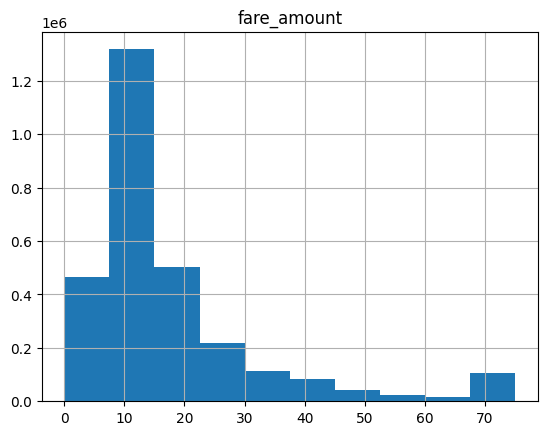

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = table.to_pandas()

stats.zscore(df['fare_amount'])
# Remove everything larger than 3 stddev
df = df[(np.abs(stats.zscore(df['fare_amount'])) < 3)]
df = df[df['fare_amount'] > 0]
df.hist(column='fare_amount')